In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import sklearn.decomposition as skde

In [28]:
mortrainF = pd.read_csv("train_values.csv")
mortrainF.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [29]:
mortrainL = pd.read_csv("train_labels.csv")
mortrainL.head()

,row_id,accepted
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [30]:
mortrainF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 no

In [31]:
print("Train Value Size:", mortrainF.shape)
print("Test Value Size:", mortrainL.shape)

Train Value Size: (500000, 22)
Test Value Size: (500000, 2)


In [33]:
mortrain = pd.concat([mortrainF,mortrainL.accepted], axis=1)

In [34]:
mortrain.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369,52,299,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16,10,306,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305,47,180,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24,37,20,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [35]:
 mortrainL.accepted.value_counts()

1    250114
0    249886
Name: accepted, dtype: int64

In [36]:
mortrainF.msa_md.value_counts().head()

-1      76982
 24     12993
 314    11014
 305    10340
 101    10059
Name: msa_md, dtype: int64

In [69]:
sns.boxplot(x= "loan_type", y= "loan_amount", data = mortrainL)

ValueError: Could not interpret input 'loan_type'

In [37]:
mortrainF.state_code.value_counts().head()

 37    61967
 6     38712
 2     32509
-1     19132
 22    17476
Name: state_code, dtype: int64

In [38]:
mortrainF.county_code.value_counts().head()

-1      20466
 20     17368
 131    16043
 68     15146
 11     14713
Name: county_code, dtype: int64

In [39]:
mortrainF.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
dtype: int64

In [40]:
mortrainF.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,4.786586,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,1.024927,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,5.000000,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,5.000000,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,5.000000,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,7.000000,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000


In [41]:
#Check for missing values
(mortrain.astype(np.object) == -1).any()

row_id                            False
loan_type                         False
property_type                     False
loan_purpose                      False
occupancy                         False
loan_amount                       False
preapproval                       False
msa_md                             True
state_code                         True
county_code                        True
applicant_ethnicity               False
applicant_race                    False
applicant_sex                     False
applicant_income                  False
population                        False
minority_population_pct           False
ffiecmedian_family_income         False
tract_to_msa_md_income_pct        False
number_of_owner-occupied_units    False
number_of_1_to_4_family_units     False
lender                            False
co_applicant                      False
accepted                          False
dtype: bool

In [23]:
#(mortrainF.astype(np.object) == ).any()

In [24]:
#mortrainF.applicant_income.isnull()

In [42]:
## Remove rows with missing values, accounting for mising values coded as '?'
cols = ['msa_md', 'state_code', 'county_code']
for column in cols:
    mortrain.loc[mortrain[column] == -1, column] = np.nan
mortrain.dropna(axis = 0, inplace = True)
mortrain.shape    

(387163, 23)

In [44]:
mortrain.isnull().sum()

row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
accepted                          0
dtype: int64

In [45]:
mortrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387163 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            387163 non-null int64
loan_type                         387163 non-null int64
property_type                     387163 non-null int64
loan_purpose                      387163 non-null int64
occupancy                         387163 non-null int64
loan_amount                       387163 non-null float64
preapproval                       387163 non-null int64
msa_md                            387163 non-null float64
state_code                        387163 non-null float64
county_code                       387163 non-null float64
applicant_ethnicity               387163 non-null int64
applicant_race                    387163 non-null int64
applicant_sex                     387163 non-null int64
applicant_income                  387163 non-null float64
population                        387163 non-null float64
minority_population_pct           387

### Feature Engineering

#### Aggregating categorical variables
Do a frequency count on all categoricals to check for columns with few samples

In [46]:
mortrain.loan_type.value_counts()

1    299969
2     57524
3     25529
4      4141
Name: loan_type, dtype: int64

In [47]:
mortrain.property_type.value_counts()

1    376741
2     10422
Name: property_type, dtype: int64

In [48]:
mortrain.loan_purpose.value_counts()

3    186848
1    160841
2     39474
Name: loan_purpose, dtype: int64

In [49]:
mortrain.occupancy.value_counts()

1    350790
2     36218
3       155
Name: occupancy, dtype: int64

In [50]:
mortrain.preapproval.value_counts()

3    323728
2     52456
1     10979
Name: preapproval, dtype: int64

In [52]:
mortrain.applicant_ethnicity.value_counts()

2    300875
3     43941
1     42166
4       181
Name: applicant_ethnicity, dtype: int64

In [53]:
mortrain.applicant_race.value_counts()

5    281557
6     46598
3     30827
2     23192
1      3028
4      1888
7        73
Name: applicant_race, dtype: int64

In [54]:
mortrain.applicant_sex.value_counts()

1    246917
2    112419
3     27757
4        70
Name: applicant_sex, dtype: int64

In [56]:
baTest = pd.read_csv("test_values.csv")

In [58]:
baTest.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,2,1,3,1,115.0,3,101,16,276,...,1,NaN,6329.0,59.536,69889.0,85.78,1874.0,2410.0,3791,True
1,1,1,1,1,1,252.0,2,87,20,68,...,1,107.0,2473.0,8.050,65313.0,100.00,947.0,1214.0,2839,True
2,2,1,1,1,1,270.0,1,-1,-1,-1,...,2,119.0,NaN,NaN,NaN,NaN,NaN,NaN,4701,False
3,3,2,1,1,1,179.0,2,376,20,11,...,2,44.0,4795.0,29.676,57766.0,100.00,1426.0,1765.0,2153,True
4,4,2,1,1,1,36.0,2,254,48,156,...,3,32.0,5246.0,5.110,63332.0,100.00,1452.0,2092.0,5710,False


In [59]:
baTest.shape

(500000, 22)

In [62]:
baTest.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  40141
population                        22480
minority_population_pct           22482
ffiecmedian_family_income         22453
tract_to_msa_md_income_pct        22517
number_of_owner-occupied_units    22574
number_of_1_to_4_family_units     22550
lender                                0
co_applicant                          0
dtype: int64

In [63]:
### Submission Format
subForm = pd.read_csv("submission_format.csv")
subForm.head()

,row_id,accepted
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [64]:
subForm.shape

(500000, 2)

### Data Preparation for Scikit Learn

In [55]:
accepted_counts = mortrain[['row_id', 'accepted']].groupby('accepted').count()
print(accepted_counts)

          row_id
accepted        
0         182474
1         204689


In [70]:
mortrain.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18.0,37.0,246.0,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369.0,52.0,299.0,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16.0,10.0,306.0,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305.0,47.0,180.0,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24.0,37.0,20.0,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [94]:
Labels = np.array(mortrain['accepted'])

In [95]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['loan_type', 'property_type', 'loan_purpose', 
                       'occupancy', 'preapproval', 'applicant_ethnicity', 'applicant_race', 'applicant_sex']

Features = encode_string(mortrain['co_applicant'])
for col in categorical_columns:
    temp = encode_string(mortrain[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

(387163, 32)


In [96]:
#Concatenate categorical and numeric columns
Features = np.concatenate([Features, np.array(mortrain[['loan_amount', 'msa_md', 
                            'state_code', 'county_code', 'applicant_income', 'population',
                            'minority_population_pct', 'ffiecmedian_family_income',
                    'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 
                    'number_of_1_to_4_family_units', 'lender']])], axis = 1)
print(Features.shape)
print(Features[:2, :])

(387163, 44)
[[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 7.0000e+01 1.8000e+01 3.7000e+01 2.4600e+02
  2.4000e+01 6.2030e+03 4.4230e+01 6.0588e+04 5.0933e+01 7.1600e+02
  2.6420e+03 4.5360e+03]
 [1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 1.7800e+02 3.6900e+02 5.2000e+01 2.9900e+02
  5.7000e+01 5.7740e+03 1.5905e+01 5.4821e+04 1.0000e+02 1.6220e+03
  2.1080e+

In [97]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 50000)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [98]:
X_train[:,32:].shape

(337163, 12)

In [99]:
#Scale the numeric features
scaler = preprocessing.StandardScaler().fit(X_train[:,32:])
X_train[:,32:] = scaler.transform(X_train[:,32:])
X_test[:,32:] = scaler.transform(X_test[:,32:])
X_train[:2,]

array([[ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        , -0.12459778,  0.45135452,  0.84275462,
        -1.43443548, -0.12938759,  0.24945554, -1.12425157,  0.69506294,
        -0.79955438,  0.45142152,  0.351711  ,  1.14243113],
       [ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.

### Compute principal Components

In [100]:
pca_mod = skde.PCA()
pca_comps = pca_mod.fit(X_train)
pca_comps

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [101]:
print(pca_comps.explained_variance_ratio_)
print(np.sum(pca_comps.explained_variance_ratio_))

[1.92093022e-01 1.17910088e-01 8.78288813e-02 7.60124192e-02
 6.94776645e-02 6.56501956e-02 5.58947939e-02 4.91185551e-02
 4.04419985e-02 3.79954960e-02 3.60225696e-02 2.86891020e-02
 2.40088794e-02 2.15334682e-02 1.67213559e-02 1.30670575e-02
 1.10863449e-02 1.00140515e-02 8.11561255e-03 6.93155376e-03
 6.26146499e-03 5.46708922e-03 4.36517181e-03 3.98316643e-03
 3.22070255e-03 2.53418682e-03 2.04437119e-03 1.51592087e-03
 8.84316193e-04 6.43341203e-04 3.56950080e-04 5.52649199e-05
 3.80918998e-05 1.17531301e-05 5.09907783e-06 5.05749919e-28
 3.48176153e-28 1.40517444e-28 1.36465010e-28 7.47101276e-29
 4.36916470e-29 6.33779424e-30 3.82949521e-32 9.88116177e-34]
0.9999999999999999


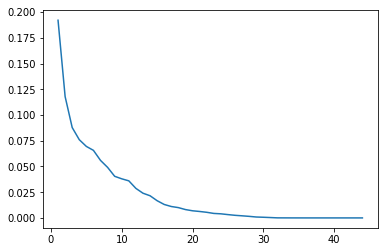

In [102]:
def plot_explained(mod):
    comps = mod.explained_variance_ratio_
    x = range(len(comps))
    x = [y + 1 for y in x]          
    plt.plot(x,comps)

plot_explained(pca_comps)

In [103]:
pca_mod_5 = skde.PCA(n_components = 5)
pca_mod_5.fit(X_train)
Comps = pca_mod_5.transform(X_train)
Comps.shape

(337163, 5)

In [104]:
## Define and fit the logistic regression model
log_mod_5 = linear_model.LogisticRegression() 
log_mod_5.fit(Comps, y_train)
print(log_mod_5.intercept_)
print(log_mod_5.coef_)

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.11806297]
[[ 0.05276708  0.25539583 -0.08846654 -0.00733144  0.02207877]]


                 Confusion matrix
                 Score positive    Score negative
Actual positive       264             23193
Actual negative        68             26475

Accuracy        0.53
AUC             0.61
Macro precision 0.66
Macro recall    0.50
 
           Positive      Negative
Num case    23457         26543
Precision    0.80          0.53
Recall       0.01          1.00
F1           0.02          0.69


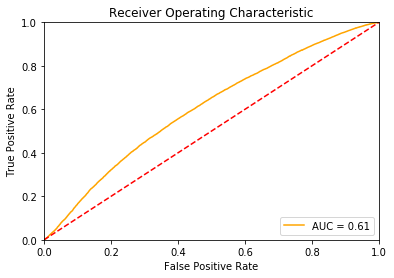

In [105]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    

probabilities = log_mod_5.predict_proba(pca_mod_5.transform(X_test))
print_metrics(y_test, probabilities, 0.3)    
plot_auc(y_test, probabilities)  

### Adding more components

In [106]:
pca_mod_10 = skde.PCA(n_components = 10)
pca_mod_10.fit(X_train)
Comps_10 = pca_mod_10.transform(X_train)
Comps_10.shape

(337163, 10)

In [107]:
## define and fit the linear regression model
log_mod_10 = linear_model.LogisticRegression() 
log_mod_10.fit(Comps_10, y_train)

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1590             21867
Actual negative       502             26041

Accuracy        0.55
AUC             0.66
Macro precision 0.65
Macro recall    0.52
 
           Positive      Negative
Num case    23457         26543
Precision    0.76          0.54
Recall       0.07          0.98
F1           0.12          0.70


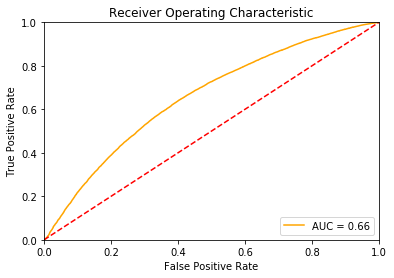

In [108]:
probabilities = log_mod_10.predict_proba(pca_mod_10.transform(X_test))
print_metrics(y_test, probabilities, 0.3)  
plot_auc(y_test, probabilities)   

In [109]:
def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_precision_macro']))]
    print('         Precision     Recall       AUC')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_precision_macro'], 
                                          scores['test_recall_macro'],
                                          scores['test_roc_auc'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro']), np.mean(scores['test_roc_auc'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro']), np.std(scores['test_roc_auc'])))
  
Labels = Labels.reshape(Labels.shape[0],)
scoring = ['precision_macro', 'recall_macro', 'roc_auc']